In [18]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize=(8, 6))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [19]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [20]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [21]:
df = pd.read_csv("brain_stroke.csv")

In [22]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [24]:
df.isnull().sum().sum()

0

In [25]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


age


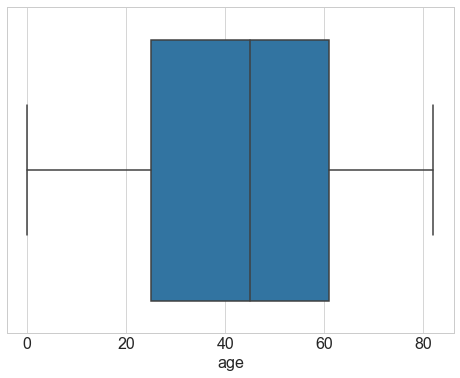


hypertension


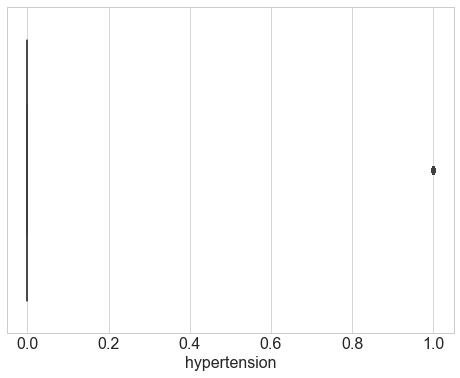


heart_disease


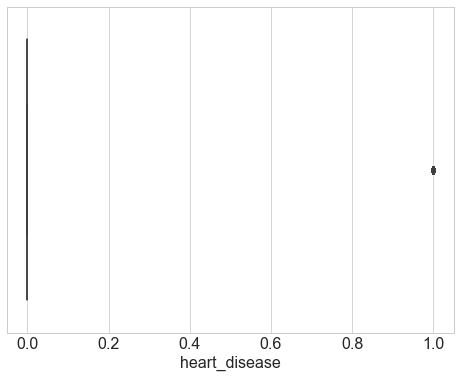


avg_glucose_level


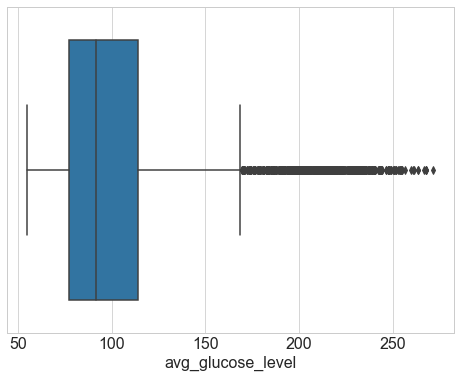


bmi


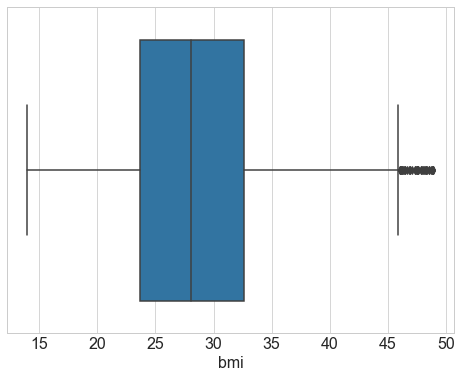


stroke


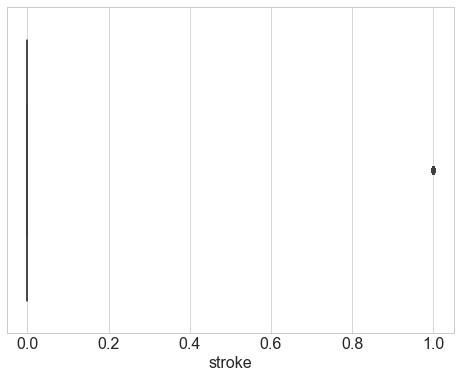

In [26]:
num_col = [col for col in df.columns if col in df.select_dtypes(include = "number")]
for col in num_col:
    print(col)
    #print(df[col].value_counts(ascending = True))
    sns.boxplot(df[col])
    plt.show()
    print()


    age from 0 to 82
    need to check into the ouliers in the gulcose level

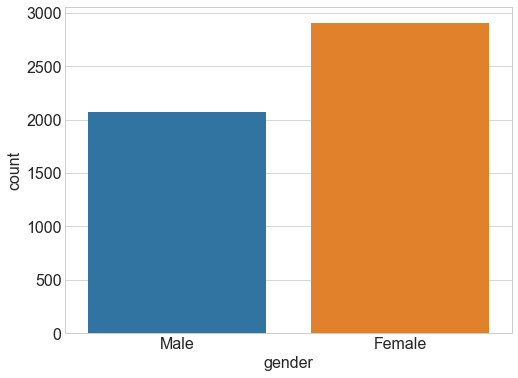

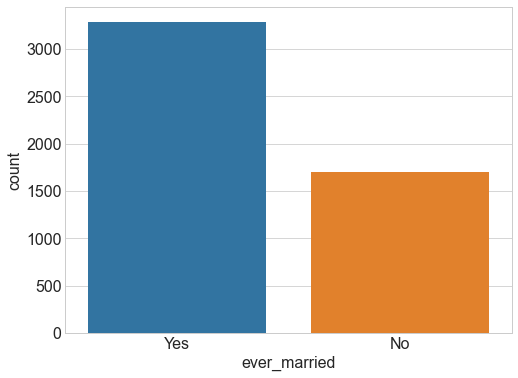

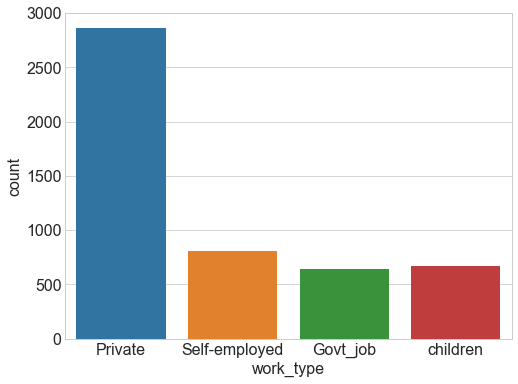

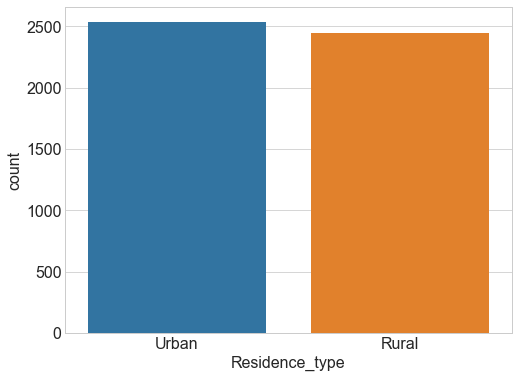

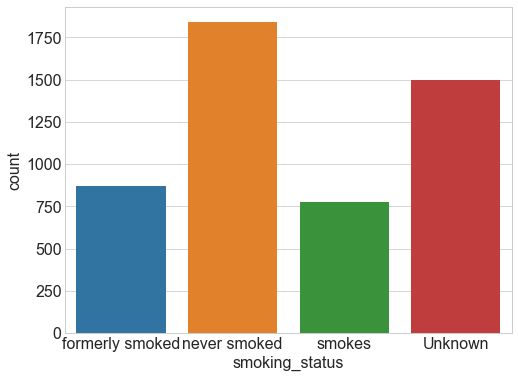

In [27]:
cat_col = [col for col in df.columns if col in df.select_dtypes(include = "object")]
for col in cat_col:
    sns.countplot(df[col])
    plt.show()

In [28]:
train_val,test = train_test_split(df, test_size = 0.2, stratify = df.stroke)
train,validate = train_test_split(train_val, test_size = 0.3, stratify = train_val.stroke)

<AxesSubplot:xlabel='smoking_status'>

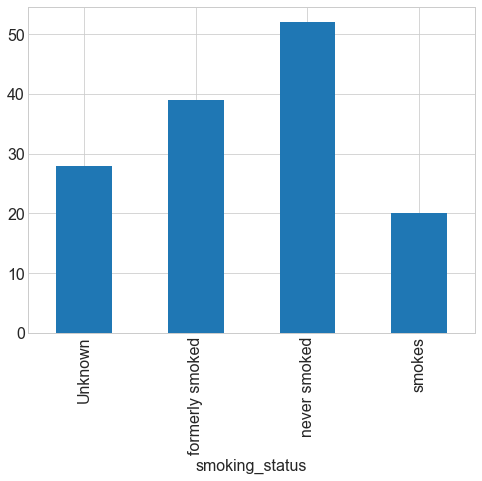

In [29]:
train.groupby("smoking_status").sum().stroke.plot.bar()

<AxesSubplot:xlabel='Residence_type'>

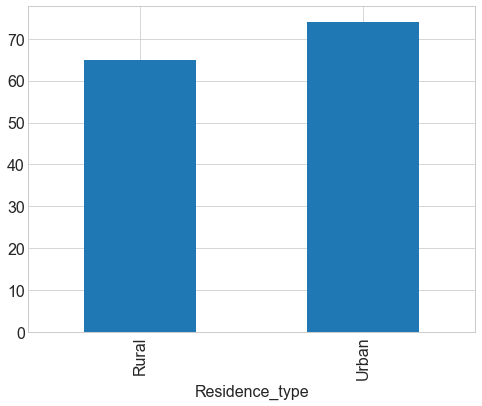

In [30]:
train.groupby("Residence_type").sum().stroke.plot.bar()

<AxesSubplot:xlabel='work_type'>

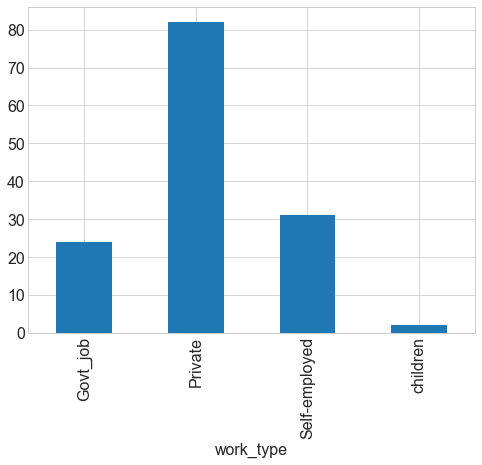

In [31]:
train.groupby("work_type").sum().stroke.plot.bar()

<AxesSubplot:xlabel='ever_married'>

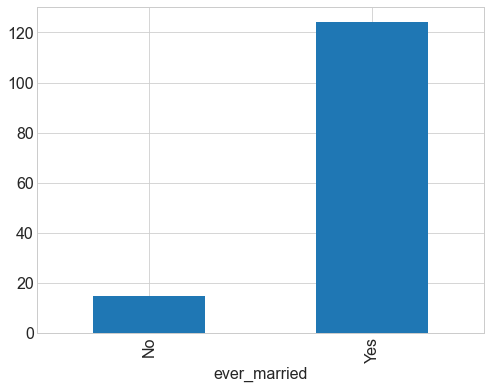

In [32]:
train.groupby("ever_married").sum().stroke.plot.bar()

<AxesSubplot:xlabel='gender'>

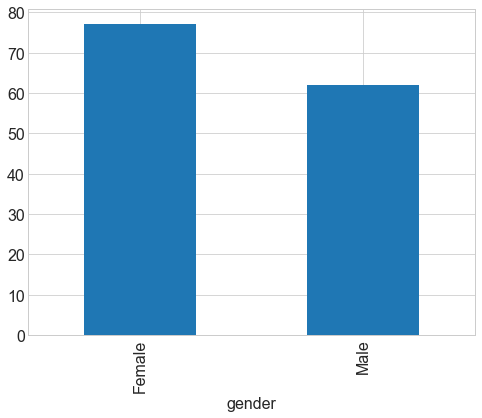

In [33]:
train.groupby("gender").sum().stroke.plot.bar()

[]

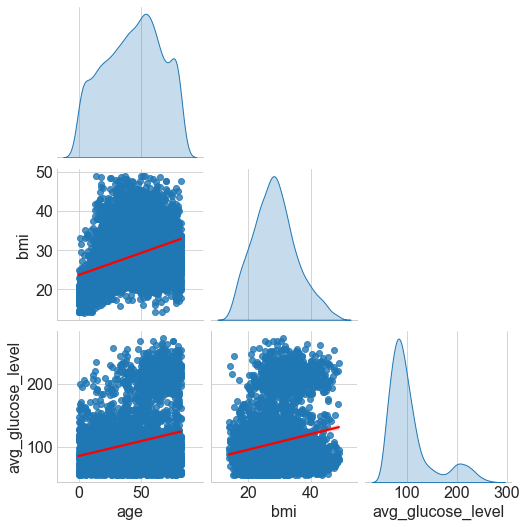

In [67]:
col = ["age", "bmi", "avg_glucose_level"]
sns.pairplot(df[col], corner = True, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.plot()

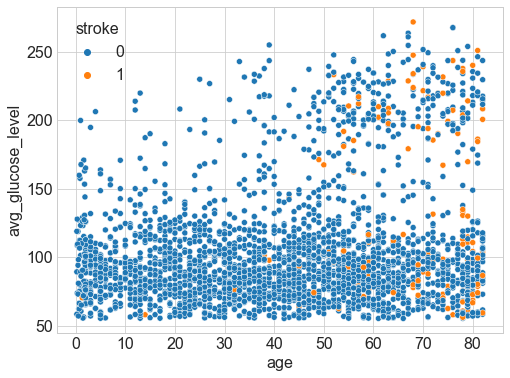

In [57]:
sns.scatterplot(x = "age", y = "avg_glucose_level", hue = "stroke", data = train)
plt.show()

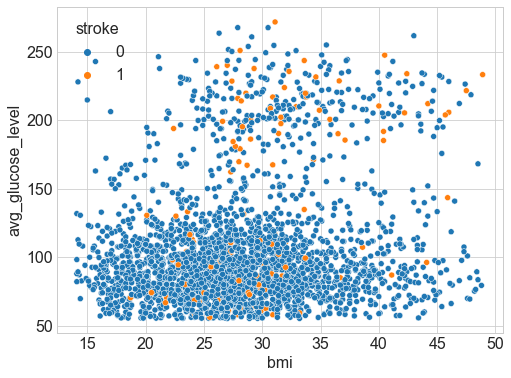

In [58]:
sns.scatterplot(x = "bmi", y = "avg_glucose_level", hue = "stroke", data = train)
plt.show()

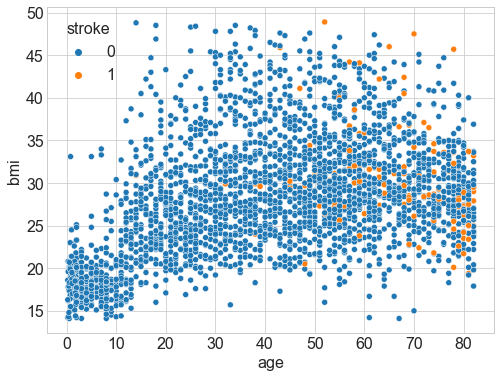

In [59]:
sns.scatterplot(x = "age", y = "bmi", hue = "stroke", data = train)
plt.show()

In [ ]:
older age people 

<AxesSubplot:>

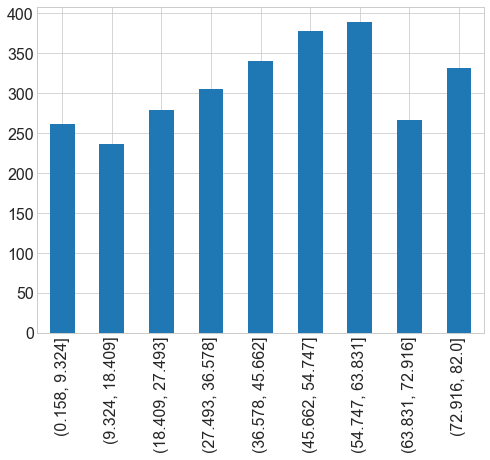

In [73]:
pd.cut(train.age, bins= 9 ).value_counts(sort = False).plot.bar()

     populaion on the older side

<AxesSubplot:>

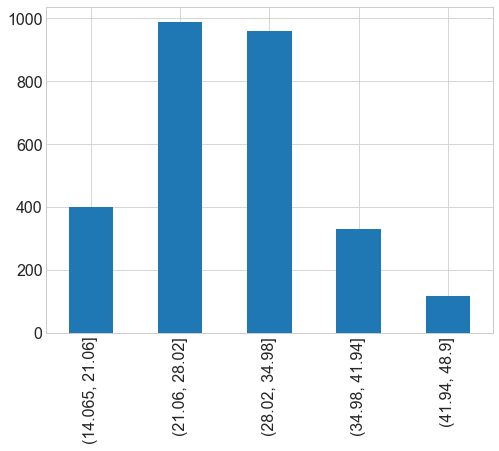

In [74]:
pd.cut(train.bmi, bins = 5).value_counts(sort = False).plot.bar()

<AxesSubplot:>

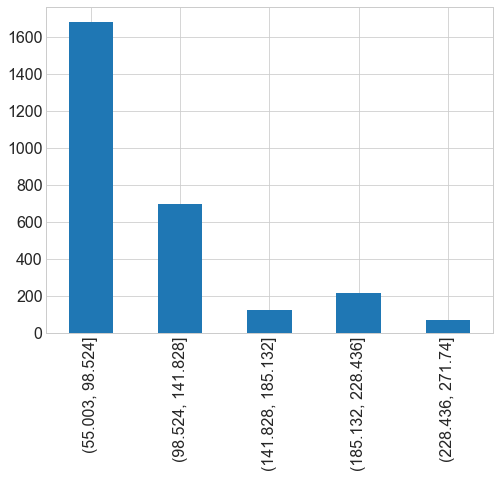

In [75]:
pd.cut(train.avg_glucose_level, bins = 5).value_counts(sort = False).plot.bar()